<a href="https://colab.research.google.com/github/prishi29/Predictive-Analysis-of-Ad-Clicks-Binary-Classification-using-Logistic-Regression/blob/main/LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##"Predictive Analysis of Ad Clicks: Binary Classification using Logistic Regression"

In [24]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [25]:
#Reading the dataset
ad = pd.read_csv("/content/advertising.csv")

In [26]:
#Printing the top columns
ad.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [27]:
#Checking the shape of the data
ad.shape

(1000, 10)

In [28]:
#Changing the name of Male Column to Gender
ad.rename(columns={'Male':'Gender'},inplace=True)

In [29]:
#Checking the statistical characteristics of the continuous variables
ad.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Gender,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


In [30]:
ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Gender                    1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [31]:
#Checking null values
ad.isnull().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Gender                      0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

There are no null values

In [32]:
ad['Clicked on Ad'].replace({0: 1, 1: 0},inplace=True)
ad.head(3)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,1
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,1
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,1


As per the description of the columns of the dataset:
- 0 -> Clicked on ad
- 1 -> Not clicked on ad

This can be misinteerpreted during correlation matrix and the negative and positive correlation may get interchanged. Hence, we change 0 to 1 and 1 to 0 for better analysis.



#Exploratory Data Analysis

In [33]:
print("The total number of unique cities are: ",ad['City'].nunique())
print("The total number of unique countries are: ",ad['Country'].nunique())

The total number of unique cities are:  969
The total number of unique countries are:  237


In [34]:
ad['Timestamp'] = pd.to_datetime(ad['Timestamp'])

In [35]:
ad['Month'] = ad['Timestamp'].dt.month
ad['Day'] = ad['Timestamp'].dt.day
ad['Hour'] = ad['Timestamp'].dt.hour
ad["Weekday"] = ad['Timestamp'].dt.dayofweek
ad = ad.drop(['Timestamp'], axis=1)
ad.head(3)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Clicked on Ad,Month,Day,Hour,Weekday
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,1,3,27,0,6
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,1,4,4,1,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,1,3,13,20,6


In [36]:
ad.dtypes

Daily Time Spent on Site    float64
Age                           int64
Area Income                 float64
Daily Internet Usage        float64
Ad Topic Line                object
City                         object
Gender                        int64
Country                      object
Clicked on Ad                 int64
Month                         int64
Day                           int64
Hour                          int64
Weekday                       int64
dtype: object

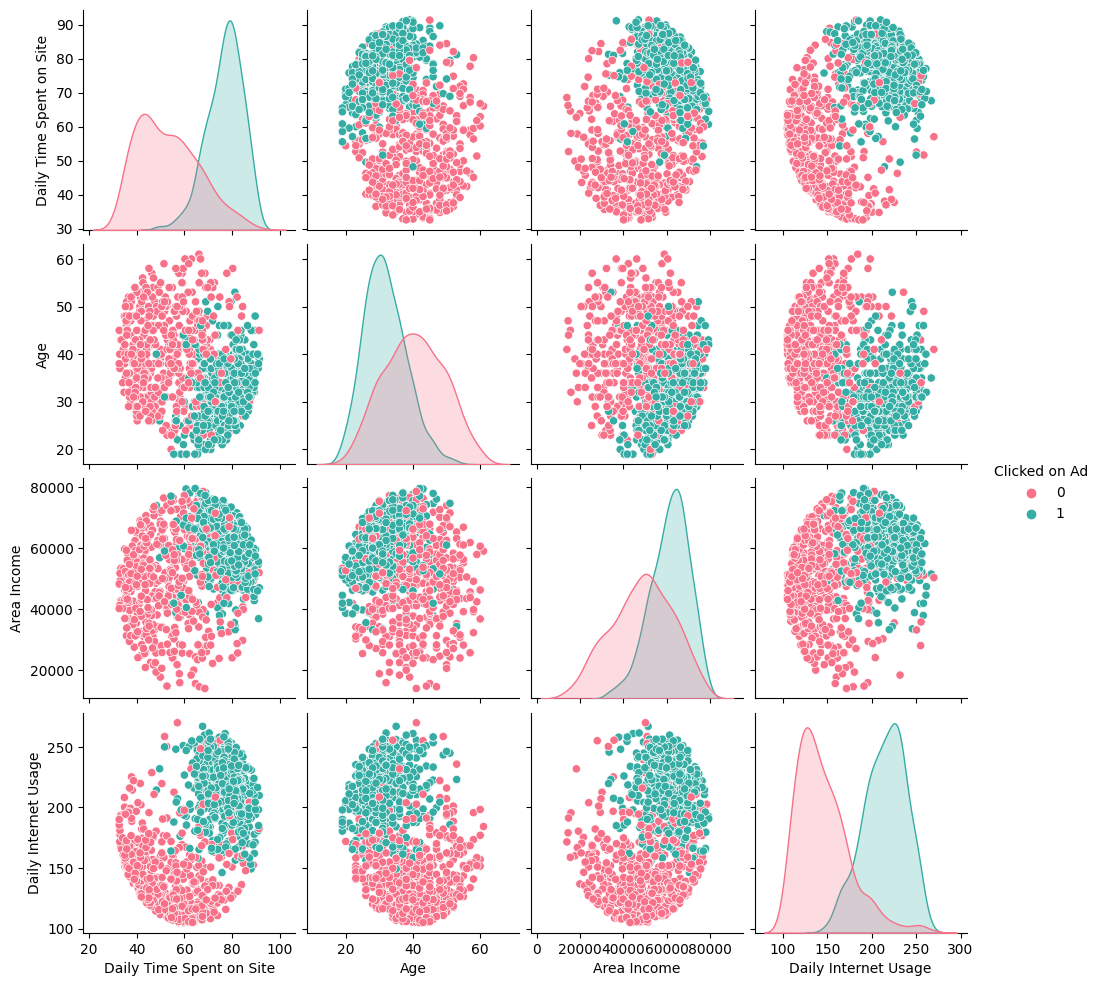

In [37]:
sns.pairplot(ad, hue = 'Clicked on Ad', vars = ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage'],palette = 'husl')

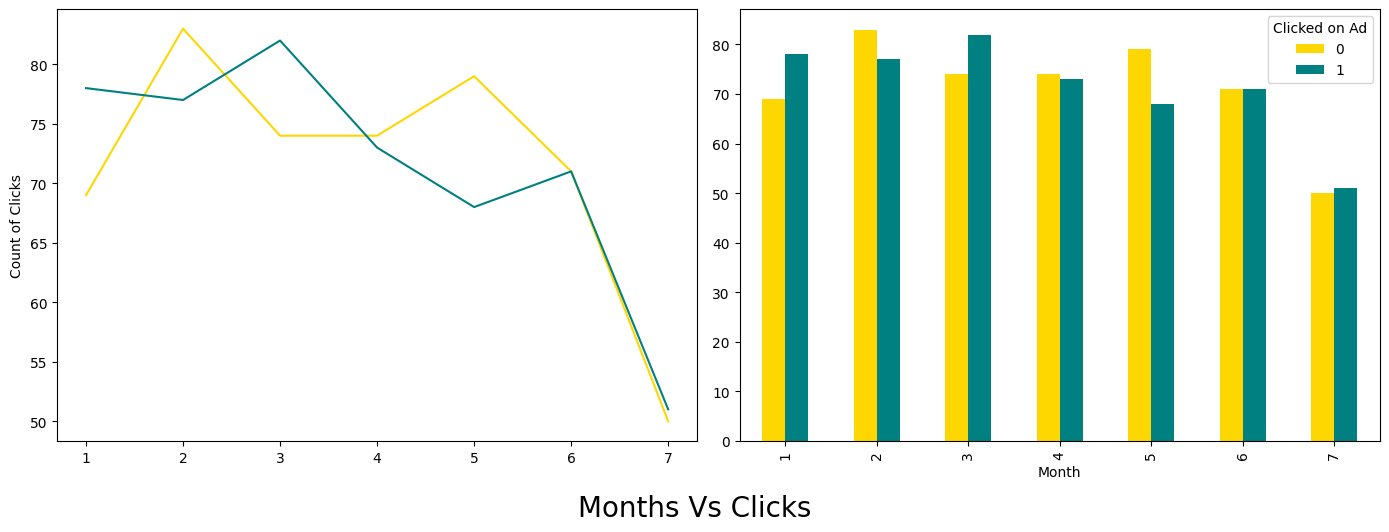

In [38]:
f,ax=plt.subplots(1,2,figsize=(14,5))
ad['Month'][ad['Clicked on Ad']==0].value_counts().sort_index().plot(color="gold",ax=ax[0])
ad['Month'][ad['Clicked on Ad']==1].value_counts().sort_index().plot(color="teal",ax=ax[0])
ax[0].set_ylabel('Count of Clicks')
pd.crosstab(ad["Clicked on Ad"], ad["Month"]).T.plot(kind = 'bar',color=['gold','teal'],ax=ax[1])
plt.tight_layout()
plt.suptitle('Months Vs Clicks',y=0,size=20)
plt.show()

1. Information of only 7 months is available.
2. February has the highest clicked on ad count.
2. March has the highest not clicked on ad count.
3. July has the lowest ad clicked and not clicked count.

In [39]:
#pd.pivot_table(ad, index = ['Weekday'], values = ['Clicked on Ad'],aggfunc= np.sum)

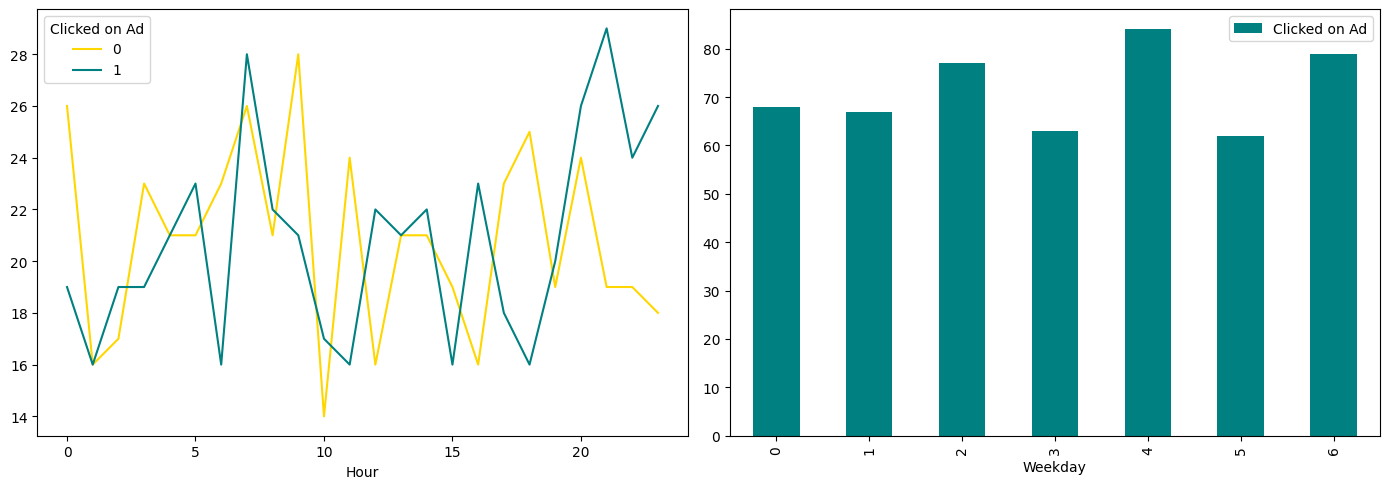

In [40]:
f,ax=plt.subplots(1,2,figsize=(14,5))
pd.crosstab(ad["Clicked on Ad"],ad["Hour"]).T.plot(style = [], color=['gold','teal'],ax = ax[0])
pd.pivot_table(ad, index = ['Weekday'], values = ['Clicked on Ad'],aggfunc= np.sum).plot(kind = 'bar',color='teal', ax=ax[1])
plt.tight_layout()
plt.show()

1. At night 9:00 P.M. the number of clicks on ads were maximum.
2. At morning 10:00 A.M. the number of no clicks on ads were maximum.
3. The ad click count are highest on Thursday.
4. The ad click count are lowest on Friday.

In [41]:
a=pd.crosstab(ad["Clicked on Ad"],ad["Gender"]).T
a

Clicked on Ad,0,1
Gender,,
0,269,250
1,231,250


<Axes: xlabel='Gender'>

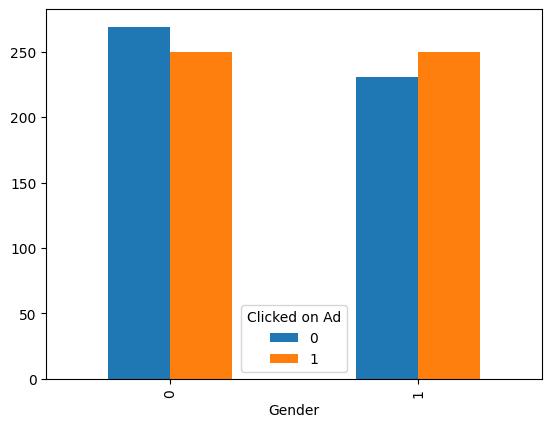

In [42]:
a.plot(kind='bar')

1. Equal number of males and females clicked on ads.
2. The number of males who did not click on ads were more than the number of females who did not click on ads.

In [43]:
country=pd.crosstab(ad['Country'], ad['Clicked on Ad']).sort_values(1,ascending = False)
country

Clicked on Ad,0,1
Country,,
Gabon,0,6
Croatia,0,6
Bolivia,0,6
Kyrgyz Republic,1,5
Singapore,1,5
...,...,...
Saint Kitts and Nevis,1,0
Sao Tome and Principe,2,0
Sierra Leone,2,0


In [44]:
city=pd.crosstab(ad['City'], ad['Clicked on Ad']).sort_values( 1,ascending = False)
city

Clicked on Ad,0,1
City,,
West Steven,0,2
Wrightburgh,0,2
New Sheila,0,2
East Timothy,0,2
Pamelamouth,0,2
...,...,...
Mariahview,1,0
Markhaven,1,0
Masseyshire,1,0


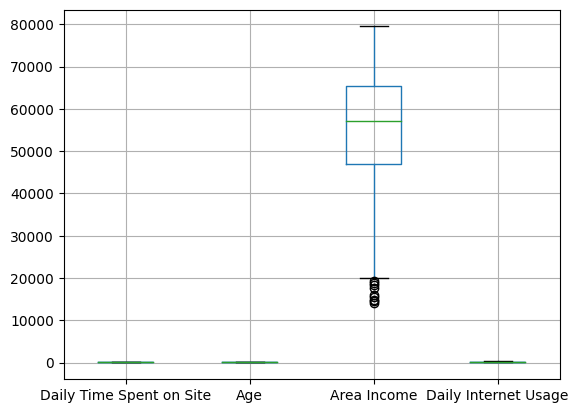

In [45]:
box = ad.boxplot(column=['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage'])

The range of Area Income is higher than the other variables indicating the requirement of scaling

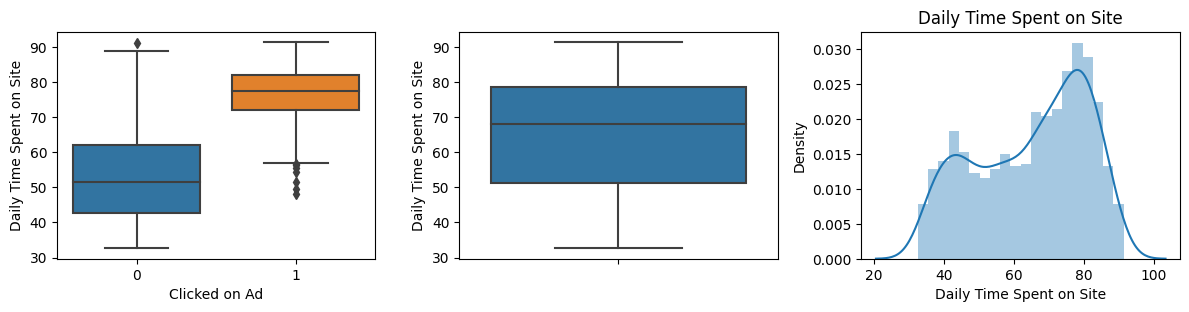

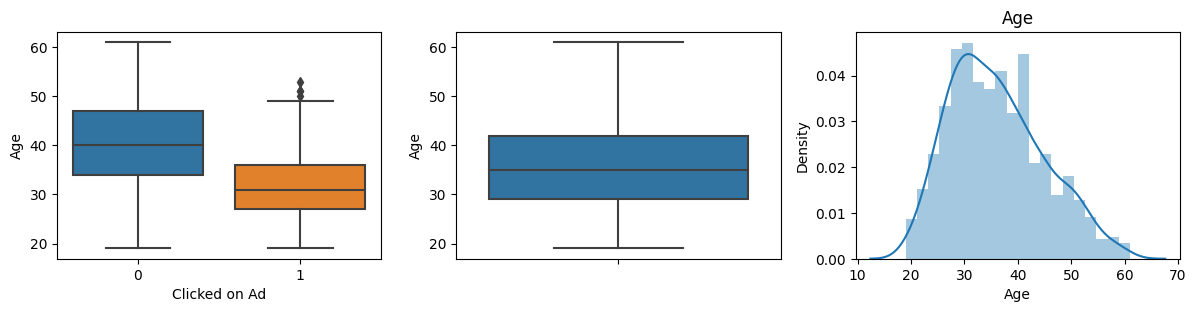

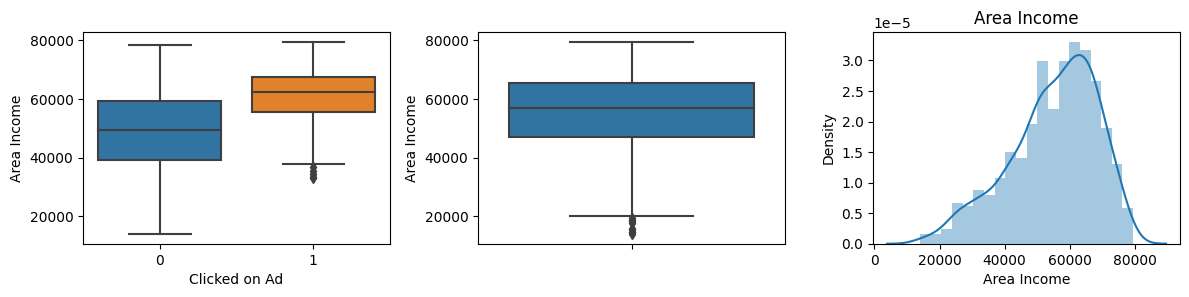

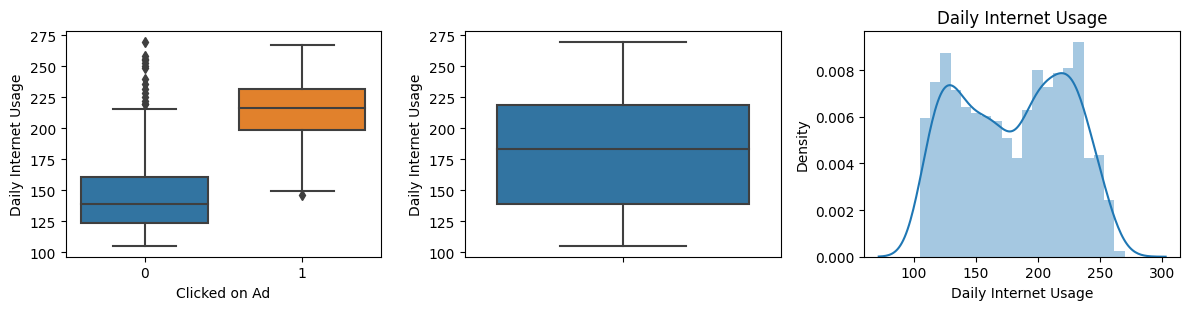

In [46]:
plots = ['Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage']
for i in plots:
    plt.figure(figsize = (12, 3))
    plt.subplot(1,3,1)
    sns.boxplot(data= ad, y=ad[i],x='Clicked on Ad')
    plt.subplot(1,3,2)
    sns.boxplot(data= ad, y=ad[i])
    plt.subplot(1,3,3)
    sns.distplot(ad[i],bins= 20)
    plt.tight_layout()
    plt.title(i)
    plt.show()

####Daily time spent on site :
1. On an average people who spent more daily time on website clicked more on ads than people who spent less daily time on website.
2. Daily Time spent on site has a bimodal distribution and is negatively skewed. Users who spent 60-90 hours daily on website were more than users who spent 30-60 hours daily on website.

####Age:

1. On an average people with lower age(around 25-35) clicked more on ads than people with higher age.
2. Age is positively skewed indicating that users between the age of 30-40 were more (It constituted about 50% of the data)

####Area Income:

1. On an average people with area income(about 60 K) clicked more on ads than people with area income(about 50K)
2. Area Income is negatively skewed indicating that users having the area income between 45K-62K were maximum.(It constituted about 50% of the data)

####Daily Internet Usage:

1. On an average people with higher daily internet usage (avg 225 mb) clicked more on ads than people with lower daily internet usage(avg 135mb)
2. Daily Internet Usage has a bimodal distribution. Number of users who used 100-190 mb of daily internet were almost equal to the number of users who used 190-300 mb of daily internet.

In [47]:
ad['Clicked on Ad'].value_counts()

1    500
0    500
Name: Clicked on Ad, dtype: int64

In [48]:
CTR = (500/1000)*100
print("The Click Through Rate(CTR) :",CTR,"%")

The Click Through Rate(CTR) : 50.0 %


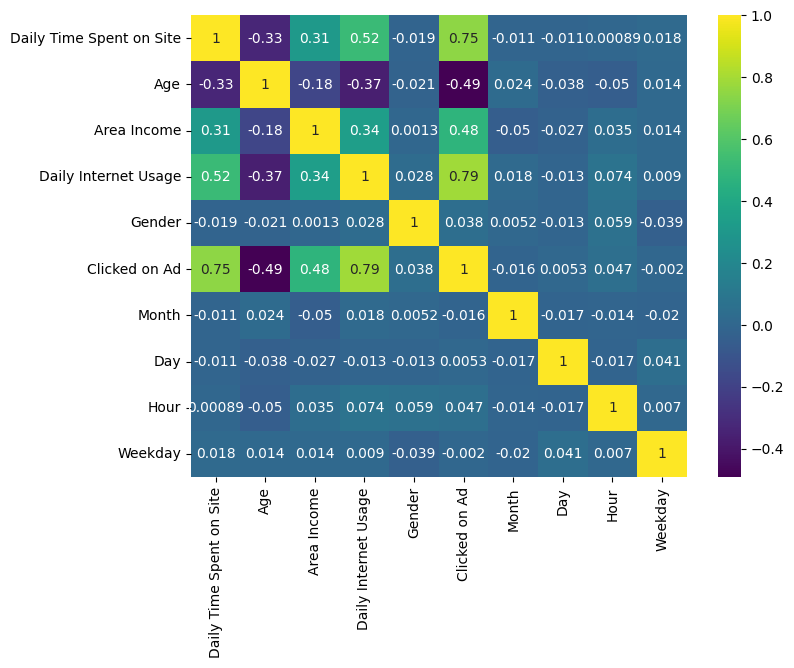

In [49]:
plt.figure(figsize=(8,6))
sns.heatmap(ad.corr(),annot=True,cmap="viridis");

In [50]:
# sns.pairplot(ad,hue='Clicked on Ad',palette='bwr')

# Approach 1 : Taking two most correlated features

In [51]:
#Dividing the target variable and the predictors
x = ad.iloc[:,[0,3]].values
y = ad.iloc[:,8].values

In [52]:
#Dividing into training and testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)

In [53]:
#Standadization to balance the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [54]:
#Training the model
from sklearn.linear_model import LogisticRegression
log_rg = LogisticRegression()
log_rg = log_rg.fit(x_train,y_train)
print("Successfully Trained")

Successfully Trained


In [55]:
#Making Predictions
y_pred = log_rg.predict(x_test)

In [56]:
from matplotlib.colors import ListedColormap

def plot_visualisation(model, x_train, y_train, x_test, y_test, model_name):

    # Plotting model on the training set
    plt.figure(figsize=(10,4))
    plt.subplot(1, 2, 1)

    x_set, y_set = x_train, y_train
    x1, x2 = np.meshgrid(np.arange(start=x_set[:, 0].min() - 2, stop=x_set[:, 0].max() + 2, step=0.01),
                         np.arange(start=x_set[:, 1].min() - 2, stop=x_set[:, 1].max() + 2, step=0.01))
    plt.contourf(x1, x2, model.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
                 alpha=0.75, cmap=ListedColormap(('blue', 'red')))
    plt.xlim(x1.min(), x1.max())
    plt.ylim(x2.min(), x2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
                    c=ListedColormap(('white', 'black'))(i), label=j)
    plt.title(f'{model_name} (Training set)')
    plt.xlabel('Daily Time Spent on Site')
    plt.ylabel('Daily Internet Usage')
    plt.legend()

    # Plotting model on the testing set
    plt.subplot(1, 2, 2)

    x_set, y_set = x_test, y_test
    x1, x2 = np.meshgrid(np.arange(start=x_set[:, 0].min() - 2, stop=x_set[:, 0].max() + 2, step=0.01),
                         np.arange(start=x_set[:, 1].min() - 2, stop=x_set[:, 1].max() + 2, step=0.01))
    plt.contourf(x1, x2, model.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
                 alpha=0.75, cmap=ListedColormap(('blue', 'red')))
    plt.xlim(x1.min(), x1.max())
    plt.ylim(x2.min(), x2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
                    c=ListedColormap(('white', 'black'))(i), label=j)
    plt.title(f'{model_name} (Testing set)')
    plt.xlabel('Daily Time Spent on Site')
    plt.ylabel('Daily Internet Usage')
    plt.legend()

    plt.tight_layout()
    plt.show()


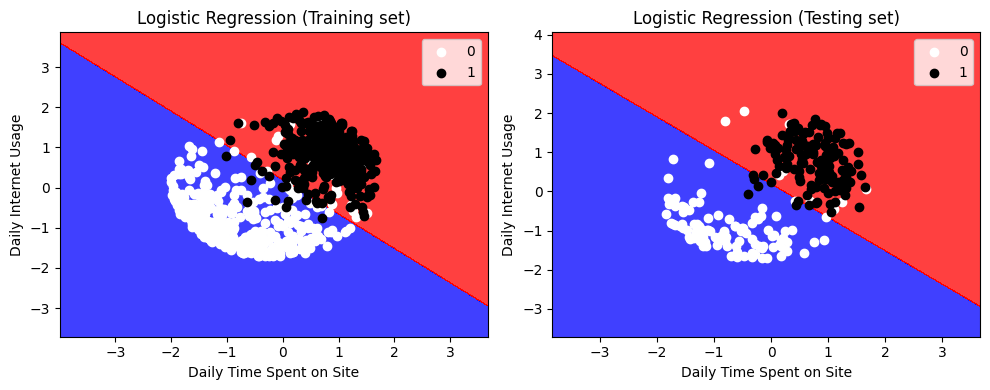

In [57]:
plot_visualisation(log_rg, x_train, y_train, x_test, y_test,'Logistic Regression')

In [58]:
from sklearn.metrics import confusion_matrix, classification_report
def model_evaluate(y_test, y_pred):
    # Calculate confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    labels = ['Not Clicked','Clicked']
    # Plot confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, cmap='YlGnBu_r', fmt='d', xticklabels=labels, yticklabels=labels)
    plt.title('Confusion Matrix')
    plt.ylabel('Actual Click on ads')
    plt.xlabel('Predicted Click on ads')
    plt.show()

    # Print classification report
    report = classification_report(y_test, y_pred, target_names=labels)
    print('Classification Report:\n', report)

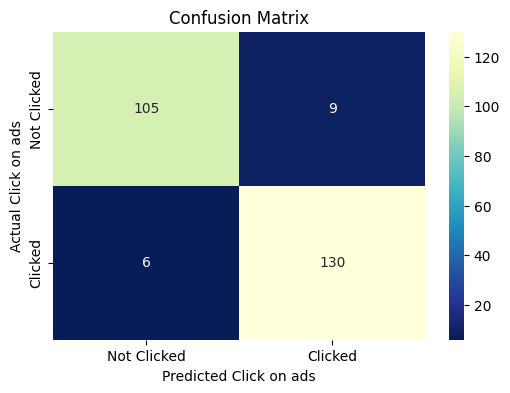

Classification Report:
               precision    recall  f1-score   support

 Not Clicked       0.95      0.92      0.93       114
     Clicked       0.94      0.96      0.95       136

    accuracy                           0.94       250
   macro avg       0.94      0.94      0.94       250
weighted avg       0.94      0.94      0.94       250



In [59]:
model_evaluate(y_test, y_pred)

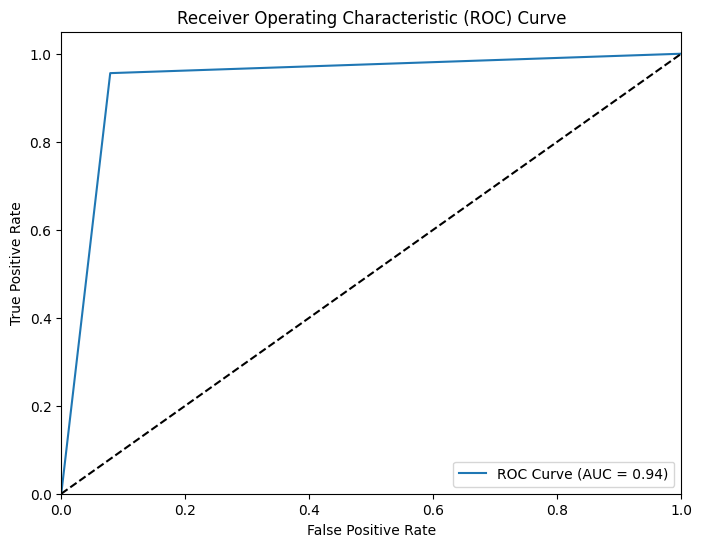

In [60]:
from sklearn.metrics import roc_curve, roc_auc_score

# Assuming y_test and y_pred are the true labels and predicted probabilities, respectively

# Calculate the false positive rate (FPR), true positive rate (TPR), and threshold values
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Calculate the AUC-ROC score
auc_score = roc_auc_score(y_test, y_pred)

# Plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], 'k--')  # Plotting the random guessing curve (diagonal line)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [61]:
#Checking the accuracy and misclassification percentage
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test,y_pred)
acc=np.round(acc*100,2)
print("Accuracy for Logistic Regression is :",acc,"%")

Accuracy for Logistic Regression is : 94.0 %


#Approach 2 : With all the variables

In [62]:
# Splitting the dataset into training and testing sets
train_df, test_df = train_test_split(ad, test_size=0.25, random_state=0)

In [63]:
input_labels = ['Daily Time Spent on Site','Age','Area Income','Daily Internet Usage']
output_label = 'Clicked on Ad'

x_train1 = train_df[input_labels]
y_train1 = train_df[output_label]

In [64]:
# Standard scaling the input variables
scaler = StandardScaler()
x_train1_scaled = scaler.fit_transform(x_train1)

In [65]:
# Extracting the input and output variables from the testing set
x_test1 = test_df[input_labels]
y_test1 = test_df[output_label].values.squeeze()

In [66]:
# Training the logistic regression model
from sklearn.ensemble import RandomForestClassifier
log_rg2 = LogisticRegression()
rf = RandomForestClassifier()
log_rg2.fit(x_train1_scaled, y_train1)
print("Successfully Trained")

Successfully Trained


In [67]:
# Standard scaling the input variables in the testing set
x_test1_scaled = scaler.transform(x_test1)
# Making predictions on the testing set
y_pred1 = log_rg2.predict(x_test1_scaled)

<Figure size 1200x300 with 0 Axes>

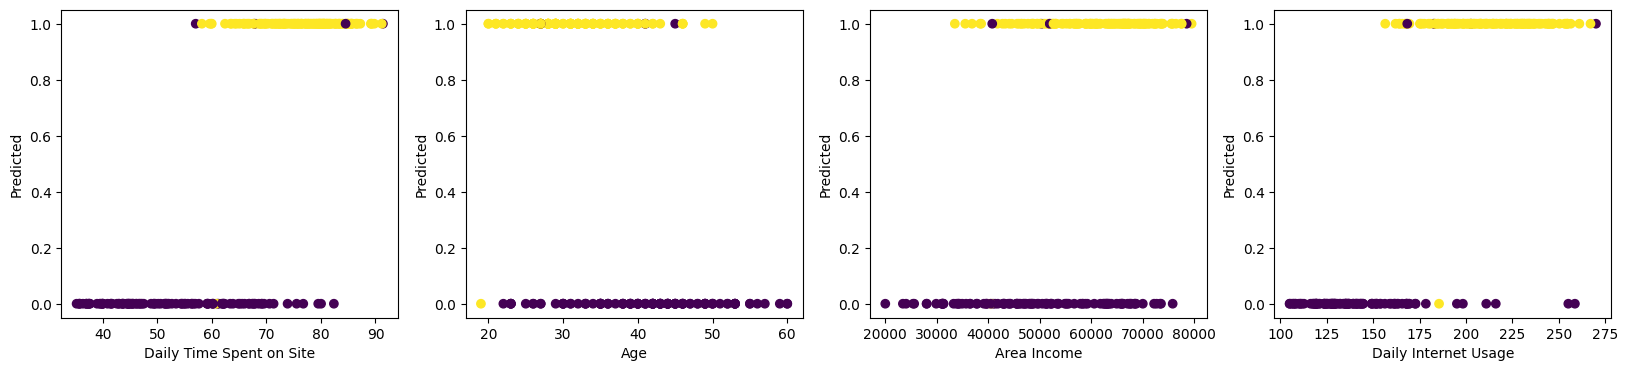

In [68]:
# Plotting the scatter plots
input_labels = ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage']
num = [0, 1, 2, 3]
plt.figure(figsize=(12, 3))
fig, axes = plt.subplots(1, 4, figsize=(20, 4))

for i, input_label in zip(num, input_labels):
    yy_pred = y_pred1.squeeze()
    x_test_view = x_test1[input_labels[i]].values.squeeze()
    axes[i].scatter(x_test_view, y_pred1, c=y_test1, cmap='viridis')
    axes[i].set_ylabel('Predicted')
    axes[i].set_xlabel(input_label)

plt.show()

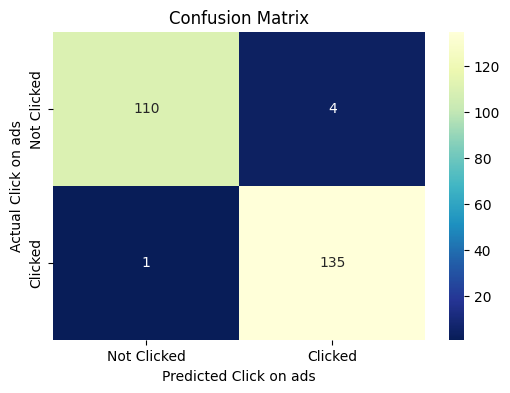

Classification Report:
               precision    recall  f1-score   support

 Not Clicked       0.99      0.96      0.98       114
     Clicked       0.97      0.99      0.98       136

    accuracy                           0.98       250
   macro avg       0.98      0.98      0.98       250
weighted avg       0.98      0.98      0.98       250



In [69]:
model_evaluate(y_test1, y_pred1)

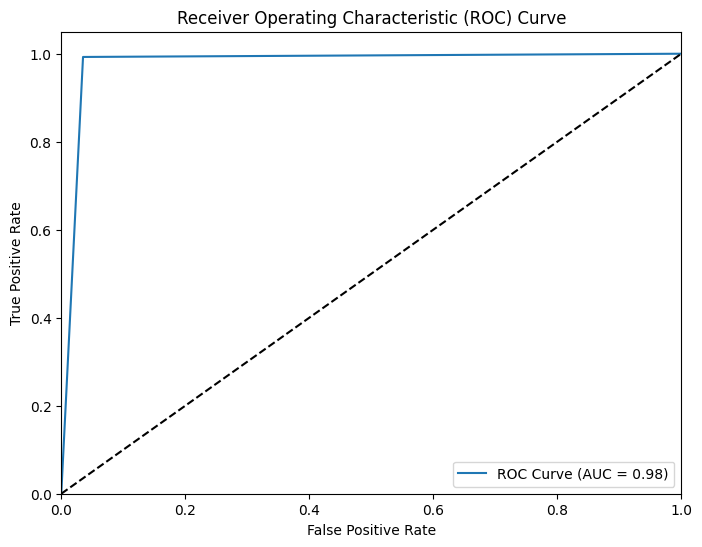

In [70]:
from sklearn.metrics import roc_curve, roc_auc_score

# Assuming y_test and y_pred are the true labels and predicted probabilities, respectively

# Calculate the false positive rate (FPR), true positive rate (TPR), and threshold values
fpr, tpr, thresholds = roc_curve(y_test1, y_pred1)

# Calculate the AUC-ROC score
auc_score1 = roc_auc_score(y_test1, y_pred1)

# Plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(auc_score1))
plt.plot([0, 1], [0, 1], 'k--')  # Plotting the random guessing curve (diagonal line)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [71]:
#Checking the accuracy and misclassification percentage
from sklearn.metrics import accuracy_score
acc1 = accuracy_score(y_test1,y_pred1)
acc1=np.round(acc1*100,2)
print("Accuracy for Logistic Regression is :",acc1,"%")

Accuracy for Logistic Regression is : 98.0 %


In [72]:
Accuracy = {"Approaches":['With 2 Variables','With all Variables'],
            "Accuracy":[acc,acc1],"AUC_Score":[auc_score,auc_score1]}
Accuracy=pd.DataFrame(Accuracy)
Accuracy

,Approaches,Accuracy,AUC_Score
0,With 2 Variables,94.0,0.938467
1,With all Variables,98.0,0.978780


#Comparison

<Axes: ylabel='Approaches'>

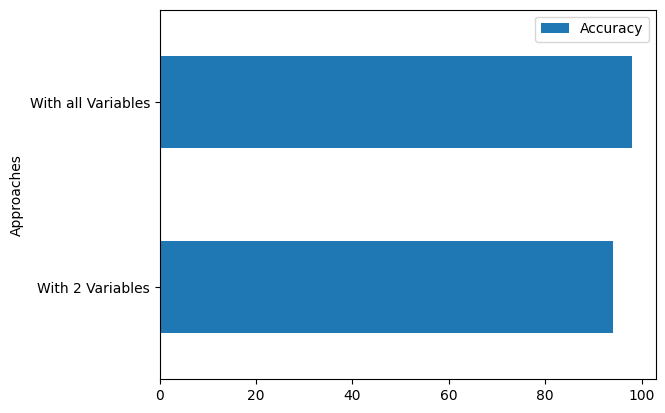

In [73]:
Accuracy.plot.barh(x='Approaches', y='Accuracy')

We see that Logistic Regression is performing quite well when all the variables are considered as feature

# A simple NLP based approach to see if the Ad topic Lines are useful for classification

In [74]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [75]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

True

In [76]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
stop_words = set(stopwords.words('english'))
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [77]:
def preprocess_text(df, column_name, new_column_name):
    new_df = df.copy()  # Create a new dataframe to store the preprocessed values

    # Convert column to string
    new_df[column_name] = new_df[column_name].astype(str)

    # Remove punctuation
    new_df[new_column_name] = new_df[column_name].apply(lambda x: re.sub("[^a-zA-Z0-9]", " ", x))

    # Convert to lowercase
    new_df[new_column_name] = new_df[new_column_name].str.lower()

    # Tokenization
    new_df[new_column_name] = new_df[new_column_name].apply(lambda x: word_tokenize(x))

    # Lemmatization and removal of stopwords
    new_df[new_column_name] = new_df[new_column_name].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x if word not in stop_words]))

    return new_df


In [78]:
ad_nlp = preprocess_text(ad,'Ad Topic Line','Clean Ad Topic Line')

In [79]:
ad_nlp.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Clicked on Ad,Month,Day,Hour,Weekday,Clean Ad Topic Line
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,1,3,27,0,6,cloned 5thgeneration orchestration
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,1,4,4,1,0,monitored national standardization
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,1,3,13,20,6,organic bottom line service desk
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,1,1,10,2,6,triple buffered reciprocal time frame
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,1,6,3,3,4,robust logistical utilization


In [80]:
ad_nlp = ad_nlp[['Clean Ad Topic Line','Clicked on Ad']]

In [81]:
ad_nlp.head()

,Clean Ad Topic Line,Clicked on Ad
0,cloned 5thgeneration orchestration,1
1,monitored national standardization,1
2,organic bottom line service desk,1
3,triple buffered reciprocal time frame,1
4,robust logistical utilization,1


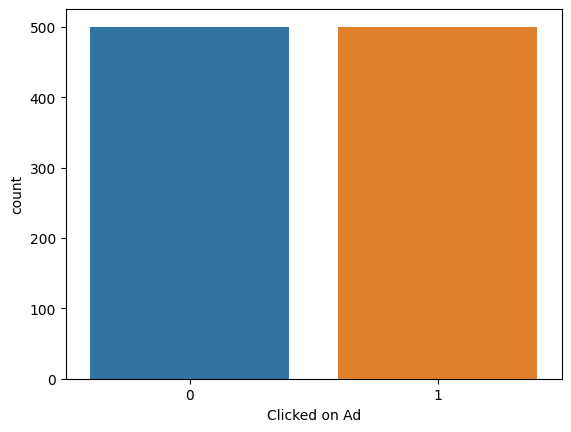

In [82]:
sns.countplot(data=ad_nlp, x='Clicked on Ad')
plt.show()

The dataset is perfectly balanced and does not require resampling

In [84]:
vectorizer = TfidfVectorizer()

X = vectorizer.fit_transform(ad_nlp['Clean Ad Topic Line'])
y = ad_nlp['Clicked on Ad']

# Step 3: Splitting the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Step 4: Model Training and Evaluation
# Train and evaluate different classification models
models = [
    ('Naive Bayes', MultinomialNB()),
    ('Logistic Regression', LogisticRegression()),
    ('SVM', SVC(kernel='linear')),
    ('Random Forest', RandomForestClassifier())
]

for name, model in models:
    # Model training
    model.fit(X_train, y_train)

    # Model evaluation
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{name} Accuracy: {accuracy:.4f}')


Naive Bayes Accuracy: 0.4967
Logistic Regression Accuracy: 0.5133
SVM Accuracy: 0.5100
Random Forest Accuracy: 0.4867


We see that the Accuracy of Logistic Regression is the highest but it is still very low with only 50% correct predictions.This is because the data is very less and hence the models are not able to learn a lot of information during training thereby giving very poor classification. This can be improved by collection more data and other pre processing